# A:INT8, W:INT8-INT6-INT4, MobileNet-V2, Calibration sample size: 1024, sensitivity set size: 16384

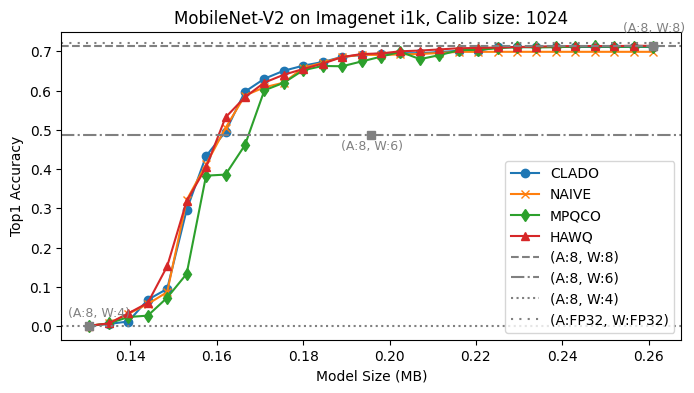

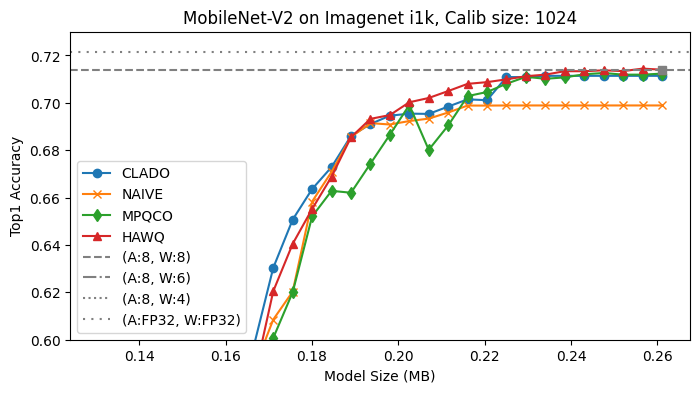

In [3]:
import matplotlib.pyplot as plt
import torch
import numpy as np

size_bounds = np.linspace(0.13051986694, 0.2610398, 30)
n_runs = 1
n_constraints = len(size_bounds)

# n_runs x n_constraints 
clado_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)] 
hawq_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

res_path = "./clado_mpqco_results/results_INT8-INT6-INT4/"
for repeat in range(n_runs):

    #clado
    clado_res = torch.load(res_path + f"clado/eval_results/sample_size16384/clado_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(clado_res):
        metrics, modelsize, bitops, mpq_decision = item
        clado_top1[repeat][j] = metrics['acc@1']
        clado_top5[repeat][j] = metrics['acc@5']
        clado_eval_loss[repeat][j] = metrics['loss']
        clado_dec[repeat][j] = mpq_decision
    
    #naive
    naive_res = torch.load(res_path + f"naive/eval_results/sample_size16384/naive_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(naive_res):
        metrics, modelsize, bitops, mpq_decision = item
        naive_top1[repeat][j] = metrics['acc@1']
        naive_top5[repeat][j] = metrics['acc@5']
        naive_eval_loss[repeat][j] = metrics['loss']
        naive_dec[repeat][j] = mpq_decision
    
    #mpqco
    mpqco_res = torch.load(res_path + f"mpqco/eval_results/sample_size16384/mpqco_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(mpqco_res):
        metrics, modelsize, bitops, mpq_decision = item
        mpqco_top1[repeat][j] = metrics['acc@1']
        mpqco_top5[repeat][j] = metrics['acc@5']
        mpqco_eval_loss[repeat][j] = metrics['loss']
        mpqco_dec[repeat][j] = mpq_decision
    
    #hawq
    hawq_res = torch.load(res_path + f"hawq/eval_results/sample_size16384/hawq_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(hawq_res):
        metrics, modelsize, bitops, mpq_decision = item
        hawq_top1[repeat][j] = metrics['acc@1']
        hawq_top5[repeat][j] = metrics['acc@5']
        hawq_eval_loss[repeat][j] = metrics['loss']
        hawq_dec[repeat][j] = mpq_decision
    
# default colors
# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

xs = size_bounds
y_clado =  np.mean(clado_top1, axis=0)
y_naive =  np.mean(naive_top1, axis=0)
y_mpqco =  np.mean(mpqco_top1, axis=0)
y_hawq =  np.mean(hawq_top1, axis=0)

plt.rcParams['figure.figsize'] = (8,4)
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([0.26103973388671875],[0.71398], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.26103973388671875 - 0.007, 0.71398 + 0.036), size=9, color='gray')
plt.axhline(y=0.71398, color='gray', linestyle='--', label='(A:8, W:8)')
# model size is: 0.26103973388671875 MB, {'acc@1': 0.71398, 'acc@5': 0.9039, 'loss': 1.8054978125}

plt.plot([0.19577980041503906],[0.4864], color='gray', marker='s')
plt.annotate("(A:8, W:6)", (0.19577980041503906 - 0.007 , 0.4864 -0.036), size=9, color='gray')
plt.axhline(y=0.4864, color='gray', linestyle='-.', label='(A:8, W:6)')
# model size is: 0.19577980041503906, {'acc@1': 0.4864, 'acc@5': 0.73102, 'loss': 3.2847003125}

plt.plot([0.13051986694335938],[0.00086], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.13051986694335938 - 0.005 , 0.00086 + 0.024,), size=9, color='gray')
plt.axhline(y=0.00086, color='gray', linestyle=':', label='(A:8, W:4)')
# model size is: 0.13051986694335938, {'acc@1': 0.00086, 'acc@5': 0.00536, 'loss': 9.6347525}

plt.axhline(y=0.72148, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'acc@1': 0.72148, 'acc@5': 0.90818, 'loss': 1.78039234375}


plt.title('MobileNet-V2 on Imagenet i1k, Calib size: 1024')
plt.ylabel('Top1 Accuracy')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()

###################zoomed in#################
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([0.26103973388671875],[0.71398], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.26103973388671875 - 0.007, 0.71398 + 0.036), size=9, color='gray')
plt.axhline(y=0.71398, color='gray', linestyle='--', label='(A:8, W:8)')
# model size is: 0.26103973388671875 MB, {'acc@1': 0.71398, 'acc@5': 0.9039, 'loss': 1.8054978125}

plt.plot([0.19577980041503906],[0.4864], color='gray', marker='s')
plt.annotate("(A:8, W:6)", (0.19577980041503906 - 0.007 , 0.4864 -0.036), size=9, color='gray')
plt.axhline(y=0.4864, color='gray', linestyle='-.', label='(A:8, W:6)')
# model size is: 0.19577980041503906, {'acc@1': 0.4864, 'acc@5': 0.73102, 'loss': 3.2847003125}

plt.plot([0.13051986694335938],[0.00086], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.13051986694335938 - 0.005 , 0.00086 + 0.024,), size=9, color='gray')
plt.axhline(y=0.00086, color='gray', linestyle=':', label='(A:8, W:4)')
# model size is: 0.13051986694335938, {'acc@1': 0.00086, 'acc@5': 0.00536, 'loss': 9.6347525}

plt.axhline(y=0.72148, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'acc@1': 0.72148, 'acc@5': 0.90818, 'loss': 1.78039234375}


plt.title('MobileNet-V2 on Imagenet i1k, Calib size: 1024')
plt.ylabel('Top1 Accuracy')
plt.xlabel('Model Size (MB)')
plt.ylim([0.60, 0.73])
plt.legend()
plt.show()


# A:INT8, W:INT8-INT6-INT4, MobileNet-V3-large, Calibration sample size: 1024, sensitivity set size: 16384

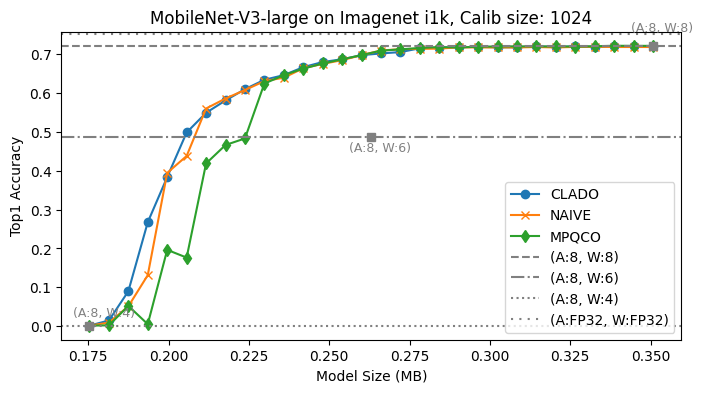

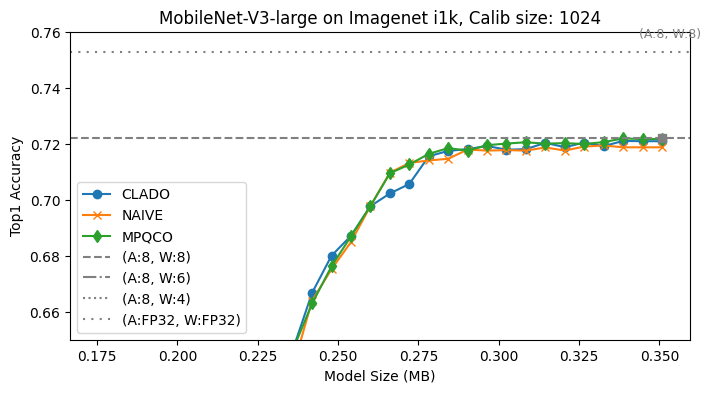

In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np

size_bounds = np.linspace(0.175384999, 0.35077, 30)
n_runs = 1
n_constraints = len(size_bounds)

# n_runs x n_constraints 
clado_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)] 
# hawq_top1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
# hawq_top5 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
# hawq_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

clado_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
# hawq_dec = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

res_path = "../MobileNetV3_large/clado_mpqco_results/results_INT8-INT6-INT4/"
for repeat in range(n_runs):

    #clado
    clado_res = torch.load(res_path + f"clado/eval_results/sample_size16384/clado_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(clado_res):
        metrics, modelsize, bitops, mpq_decision = item
        clado_top1[repeat][j] = metrics['acc@1']
        clado_top5[repeat][j] = metrics['acc@5']
        clado_eval_loss[repeat][j] = metrics['loss']
        clado_dec[repeat][j] = mpq_decision
    
    #naive
    naive_res = torch.load(res_path + f"naive/eval_results/sample_size16384/naive_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(naive_res):
        metrics, modelsize, bitops, mpq_decision = item
        naive_top1[repeat][j] = metrics['acc@1']
        naive_top5[repeat][j] = metrics['acc@5']
        naive_eval_loss[repeat][j] = metrics['loss']
        naive_dec[repeat][j] = mpq_decision
    
    #mpqco
    mpqco_res = torch.load(res_path + f"mpqco/eval_results/sample_size16384/mpqco_a8_w8-6-4_seed43_eval_results_run{repeat}.pt")
    for j, item in enumerate(mpqco_res):
        metrics, modelsize, bitops, mpq_decision = item
        mpqco_top1[repeat][j] = metrics['acc@1']
        mpqco_top5[repeat][j] = metrics['acc@5']
        mpqco_eval_loss[repeat][j] = metrics['loss']
        mpqco_dec[repeat][j] = mpq_decision
    
    # #hawq
    # hawq_res = torch.load(res_path + "hawq/hawq_8_w8-4-2_seed43_eval_results_4096examples.pt")
    # for j, item in enumerate(hawq_res):
    #     metrics, modelsize, bitops, mpq_decision = item
    #     hawq_top1[repeat][j] = metrics['acc@1']
    #     hawq_top5[repeat][j] = metrics['acc@5']
    #     hawq_eval_loss[repeat][j] = metrics['loss']
    #     hawq_dec[repeat][j] = mpq_decision
    
# default colors
# ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

xs = size_bounds
y_clado =  np.mean(clado_top1, axis=0)
y_naive =  np.mean(naive_top1, axis=0)
y_mpqco =  np.mean(mpqco_top1, axis=0)
# y_hawq =  np.mean(hawq_top1, axis=0)

plt.rcParams['figure.figsize'] = (8,4)
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
# plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([0.3507699966430664],[0.72202], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.3507699966430664 - 0.007, 0.72202 + 0.036), size=9, color='gray')
plt.axhline(y=0.72202, color='gray', linestyle='--', label='(A:8, W:8)')
# model size is: 0.3507699966430664, {'acc@1': 0.72202, 'acc@5': 0.90984, 'loss': 1.35266453125}

plt.plot([0.2630774974822998],[0.4864], color='gray', marker='s')
plt.annotate("(A:8, W:6)", (0.2630774974822998 - 0.007 , 0.4864 -0.036), size=9, color='gray')
plt.axhline(y=0.4864, color='gray', linestyle='-.', label='(A:8, W:6)')
# model size is: 0.2630774974822998, {'acc@1': 0.5482, 'acc@5': 0.79134, 'loss': 2.19730921875}

plt.plot([0.1753849983215332],[0.00086], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.1753849983215332 - 0.005 , 0.00086 + 0.024,), size=9, color='gray')
plt.axhline(y=0.00086, color='gray', linestyle=':', label='(A:8, W:4)')
# model size is: 0.1753849983215332, {'acc@1': 0.00108, 'acc@5': 0.00546, 'loss': 8.29532}

plt.axhline(y=0.75258, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'acc@1': 0.75258, 'acc@5': 0.92572, 'loss': 1.1744103125}


plt.title('MobileNet-V3-large on Imagenet i1k, Calib size: 1024')
plt.ylabel('Top1 Accuracy')
plt.xlabel('Model Size (MB)')
#plt.ylim([0.65, 0.76])
plt.legend()
plt.show()

##############zoomed in###############
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(xs, y_clado, marker='o', label=f'CLADO', color='#1f77b4')
plt.plot(xs, y_naive, marker='x', label=f'NAIVE', color='#ff7f0e')
plt.plot(xs, y_mpqco, marker='d', label=f'MPQCO', color='#2ca02c')
# plt.plot(xs, y_hawq, marker='^', label=f'HAWQ', color='#d62728')


plt.plot([0.3507699966430664],[0.72202], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.3507699966430664 - 0.007, 0.72202 + 0.036), size=9, color='gray')
plt.axhline(y=0.72202, color='gray', linestyle='--', label='(A:8, W:8)')
# model size is: 0.3507699966430664, {'acc@1': 0.72202, 'acc@5': 0.90984, 'loss': 1.35266453125}

plt.plot([0.2630774974822998],[0.4864], color='gray', marker='s')
plt.annotate("(A:8, W:6)", (0.2630774974822998 - 0.007 , 0.4864 -0.036), size=9, color='gray')
plt.axhline(y=0.4864, color='gray', linestyle='-.', label='(A:8, W:6)')
# model size is: 0.2630774974822998, {'acc@1': 0.5482, 'acc@5': 0.79134, 'loss': 2.19730921875}

plt.plot([0.1753849983215332],[0.00086], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.1753849983215332 - 0.005 , 0.00086 + 0.024,), size=9, color='gray')
plt.axhline(y=0.00086, color='gray', linestyle=':', label='(A:8, W:4)')
# model size is: 0.1753849983215332, {'acc@1': 0.00108, 'acc@5': 0.00546, 'loss': 8.29532}

plt.axhline(y=0.75258, color='gray', linestyle=(0, (1, 3)), label='(A:FP32, W:FP32)')
# fp32 metrics: {'acc@1': 0.75258, 'acc@5': 0.92572, 'loss': 1.1744103125}

plt.title('MobileNet-V3-large on Imagenet i1k, Calib size: 1024')
plt.ylabel('Top1 Accuracy')
plt.xlabel('Model Size (MB)')
plt.ylim([0.65, 0.76])
plt.legend()
plt.show()
